In [1]:
from flask import Flask, render_template
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.express as px
import numpy as np
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler, PowerTransformer
from pymongo import MongoClient
from sklearn.preprocessing import LabelEncoder
from plotly.subplots import make_subplots



app = Flask(__name__)


In [2]:
# File path to the CSV
CSV_PATH = r"C:\Users\habys\Desktop\Alzheimer project\data\cleaned_alzheimers_disease_data.csv"
STATIC_PATH = os.path.join("static", "images")
# Load CSV file
file_path = r"C:\Users\habys\Desktop\Alzheimer project\data\cleaned_alzheimers_disease_data.csv"
df = pd.read_csv(file_path)

# Preview first few rows
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,Smoking,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,4751,73,Male,White,Secondary,No,No,No,Yes,Yes,...,Impaired,No,No,Dependent,No,No,No,Yes,No,No
1,4752,89,Male,White,NaN,No,No,No,No,No,...,Impaired,No,No,Dependent,No,No,No,No,Yes,No
2,4753,73,Male,NaN,Primary,No,Yes,No,No,No,...,Impaired,No,No,Independent,No,Yes,No,Yes,No,No
3,4754,74,Female,White,Primary,Yes,No,No,No,No,...,Impaired,No,Yes,Independent,No,No,No,No,No,No
4,4755,89,Male,White,NaN,No,No,No,No,No,...,Impaired,No,No,Dependent,No,No,Yes,Yes,No,No


In [3]:
#load dataset
df=pd.read_csv('data/cleaned_alzheimers_disease_data.csv')





In [4]:
# Create an instance of MongoClient
mongo = MongoClient(port=27017)


In [5]:
# assign the alzheimer_database to a variable name
alzheimer_db = mongo['alzheimer_database']

In [6]:
client = MongoClient("mongodb://localhost:27017/")
db = client["alzheimers_db"]
collection = db["alzheimers_patients"]


In [7]:
df = pd.read_csv(
    "data/cleaned_alzheimers_disease_data.csv",
    delimiter=",",         # or sep=","
    encoding="utf-8",      # use 'ISO-8859-1' if you get encoding errors
    na_values=["NA", "?", "null"],  # treat these as NaN
)


In [8]:
# Convert DataFrame to list of dicts (records)
data_dict = df.to_dict("records")

# Optional: drop the collection if you're reloading fresh
collection.drop()

# Insert data
collection.insert_many(data_dict)

print(f"Inserted {collection.count_documents({})} documents into the 'patients' collection.")

Inserted 2149 documents into the 'patients' collection.


In [40]:
# Get the alzheimers_info_df columns.
df.columns

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'Smoking',
       'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes',
       'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP', 'DiastolicBP',
       'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness', 'Diagnosis', 'AgeRange'],
      dtype='object')

In [10]:
df.columns = df.columns.str.strip()

In [11]:
results = collection.find()
results = list(collection.find())

In [12]:
# Query the MongoDB collection
results = list(collection.find())  # <-- Make sure this is defined first

if results:
    df_results = pd.DataFrame(results)

    if '_id' in df_results.columns:
        # Flatten the _id field if it's a nested dictionary
        df_results['_id'] = df_results['_id'].apply(lambda x: str(x))  # or extract fields as needed

    display(df_results.head())
else:
    print("No results found in the collection.")

,_id,PatientID,Age,Gender,Ethnicity,EducationLevel,Smoking,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,67f8743805b0d324f2141d1d,4751,73,Male,White,Secondary,No,No,No,Yes,...,Impaired,No,No,Dependent,No,No,No,Yes,No,No
1,67f8743805b0d324f2141d1e,4752,89,Male,White,NaN,No,No,No,No,...,Impaired,No,No,Dependent,No,No,No,No,Yes,No
2,67f8743805b0d324f2141d1f,4753,73,Male,NaN,Primary,No,Yes,No,No,...,Impaired,No,No,Independent,No,Yes,No,Yes,No,No
3,67f8743805b0d324f2141d20,4754,74,Female,White,Primary,Yes,No,No,No,...,Impaired,No,Yes,Independent,No,No,No,No,No,No
4,67f8743805b0d324f2141d21,4755,89,Male,White,NaN,No,No,No,No,...,Impaired,No,No,Dependent,No,No,Yes,Yes,No,No


In [13]:
print(df.shape)

(2149, 29)


In [14]:
print(df.columns)

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'Smoking',
       'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes',
       'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP', 'DiastolicBP',
       'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness', 'Diagnosis'],
      dtype='object')


In [15]:
print(df.head)

<bound method NDFrame.head of       PatientID  Age  Gender Ethnicity EducationLevel Smoking  \
0          4751   73    Male     White      Secondary      No   
1          4752   89    Male     White            NaN      No   
2          4753   73    Male       NaN        Primary      No   
3          4754   74  Female     White        Primary     Yes   
4          4755   89    Male     White            NaN      No   
...         ...  ...     ...       ...            ...     ...   
2144       6895   61    Male     White        Primary      No   
2145       6896   75    Male     White      Secondary      No   
2146       6897   77    Male     White        Primary      No   
2147       6898   78  Female       NaN        Primary      No   
2148       6899   72    Male     White      Secondary      No   

     FamilyHistoryAlzheimers CardiovascularDisease Diabetes Depression  ...  \
0                         No                    No      Yes        Yes  ...   
1                         No   

In [16]:
# Aggregation pipeline to group by Diabetes and Diagnosis
pipeline = [
    {
        "$group": {
            "_id": {
                "Diabetes": "$Diabetes",
                "Diagnosis": "$Diagnosis"
            },
            "count": { "$sum": 1 }
        }
    },
    {
        "$project": {
            "_id": 0,
            "Diabetes": "$_id.Diabetes",
            "Diagnosis": "$_id.Diagnosis",
            "count": 1
        }
    }
]

In [17]:
results = list(collection.aggregate(pipeline))

# Convert to DataFrame — now it's flat, no need for normalization
df_flat = pd.DataFrame(results)

print(df_flat)


   count Diabetes Diagnosis
0    657       No       Yes
1   1168       No        No
2    221      Yes        No
3    103      Yes       Yes


In [18]:

# Create a copy for encoding
df_encoded = df.copy()

# Encode all categorical columns using LabelEncoder (since most are binary or low cardinality)
label_encoders = {}
for col in df_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le
# Calculate correlation matrix
correlation_matrix = df_encoded.corr()

# Get correlations with Diagnosis
diagnosis_correlation = correlation_matrix["Diagnosis"].drop("Diagnosis").sort_values(key=abs, ascending=False)

diagnosis_correlation.head(10)


MMSE                      -0.312559
MemoryComplaints           0.306742
ADL                       -0.299372
BehavioralProblems         0.224350
CholesterolHDL            -0.047235
PatientID                  0.041019
Hypertension               0.035080
EducationLevel             0.034765
FamilyHistoryAlzheimers   -0.032900
Diabetes                  -0.031508
Name: Diagnosis, dtype: float64

In [19]:
if '_id' in df_results.columns and isinstance(df_results['_id'].iloc[0], dict):
    df_results = df_results.join(pd.json_normalize(df_results['_id'])).drop(columns=['_id'])
elif '_id' in df_results.columns:
    df_results['_id'] = df_results['_id'].astype(str)

In [22]:
# Run the aggregation
results = list(collection.aggregate(pipeline))

# Convert to DataFrame for readability
df_results = pd.DataFrame(results)

# Check if '_id' column exists and is a dictionary
if '_id' in df_results.columns:
    if isinstance(df_results['_id'].iloc[0], dict):
        # If _id is a dict, unpack its keys into separate columns
        df_results = df_results.join(pd.json_normalize(df_results['_id']))
    else:
        # If _id is just an ObjectId, convert it to string
        df_results['_id'] = df_results['_id'].astype(str)
    
    # Drop the original _id column
    df_results.drop(columns=['_id'], inplace=True)

# Print results
print(df_results)

   count Diabetes Diagnosis
0    657       No       Yes
1   1168       No        No
2    221      Yes        No
3    103      Yes       Yes


# Drop fully empty columns

In [23]:
df = df.drop(columns=["BMI", "DoctorInCharge"], errors='ignore')

# Encode categorical variables

In [24]:
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le
    # Calculate correlation matrix
correlation_matrix = df.corr()

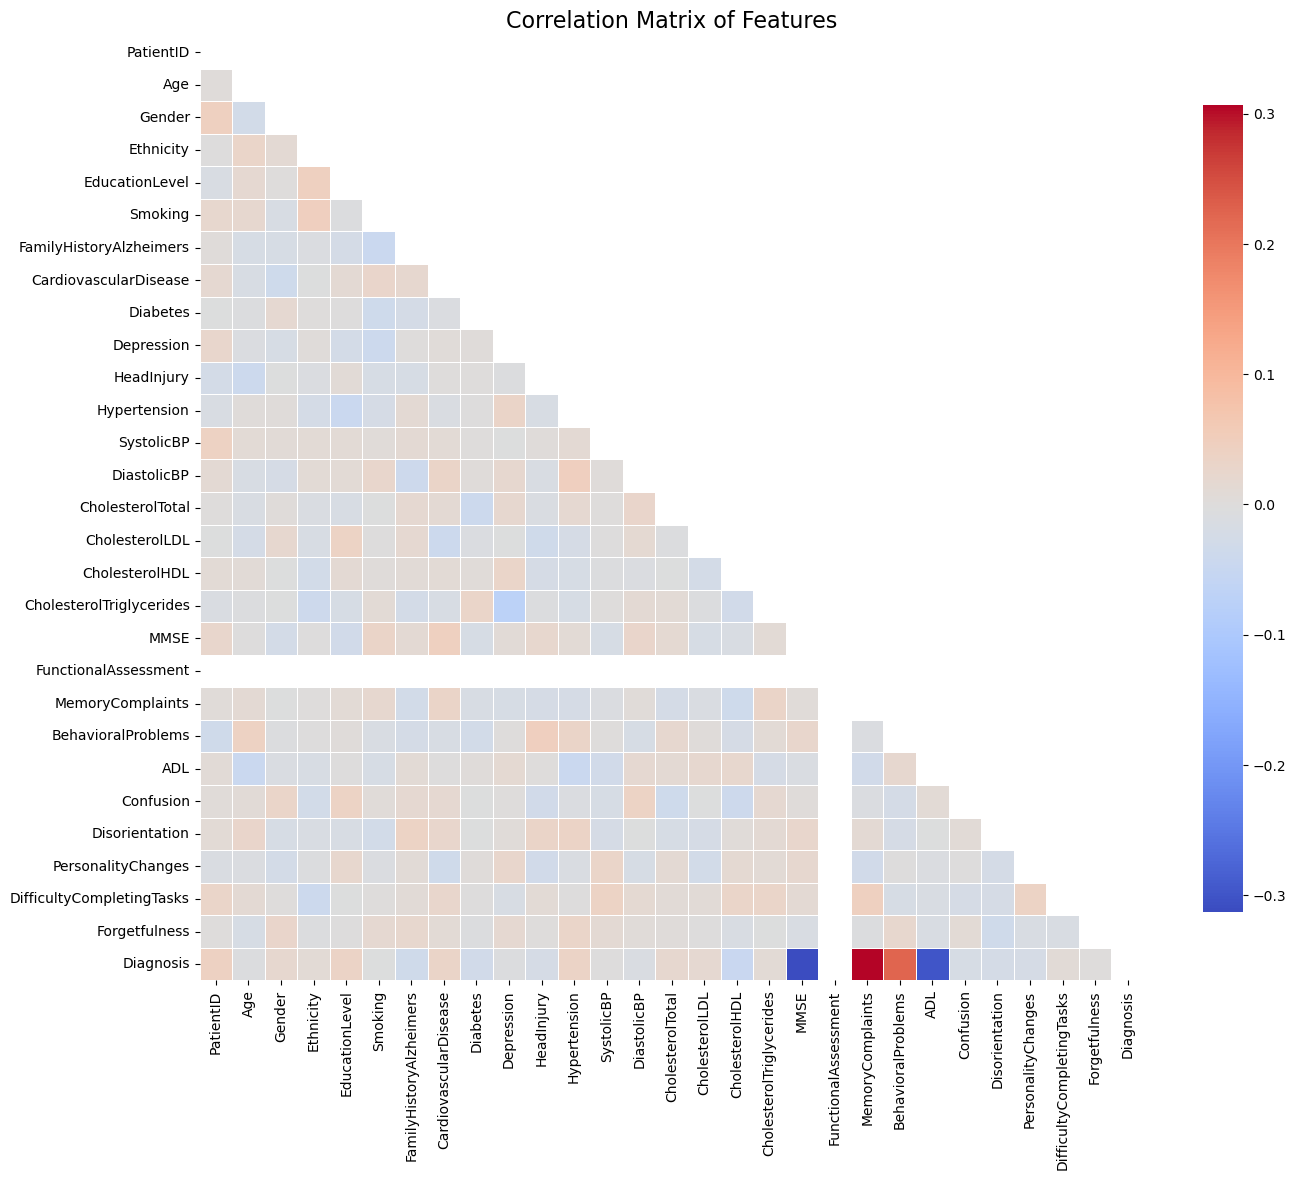

In [31]:
# Ensure output directory exists
output_dir = "visualizations"
os.makedirs(output_dir, exist_ok=True)

# Plot the heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(
    correlation_matrix,
    cmap='coolwarm',
    annot=False,
    mask=np.triu(np.ones_like(correlation_matrix, dtype=bool)),
    linewidths=0.5,
    cbar_kws={"shrink": .8},
    square=True
)
plt.title("Correlation Matrix of Features", fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()

# Save the plot
plt.savefig(os.path.join(output_dir, "Correlation Matrix of Features.png"))

# Show the plot
plt.show()


In [32]:
#Create age bins
df_viz = df
age_bins = [0, 50, 60, 70, 80, 90, 100]
age_labels = ['<50', '50-59', '60-69', '70-79', '80-89', '90+']
df_viz['AgeRange'] = pd.cut(df_viz['Age'], bins=age_bins, labels=age_labels)

# Plot 1: Count of patients by Age Range, Gender, and Diabetes status

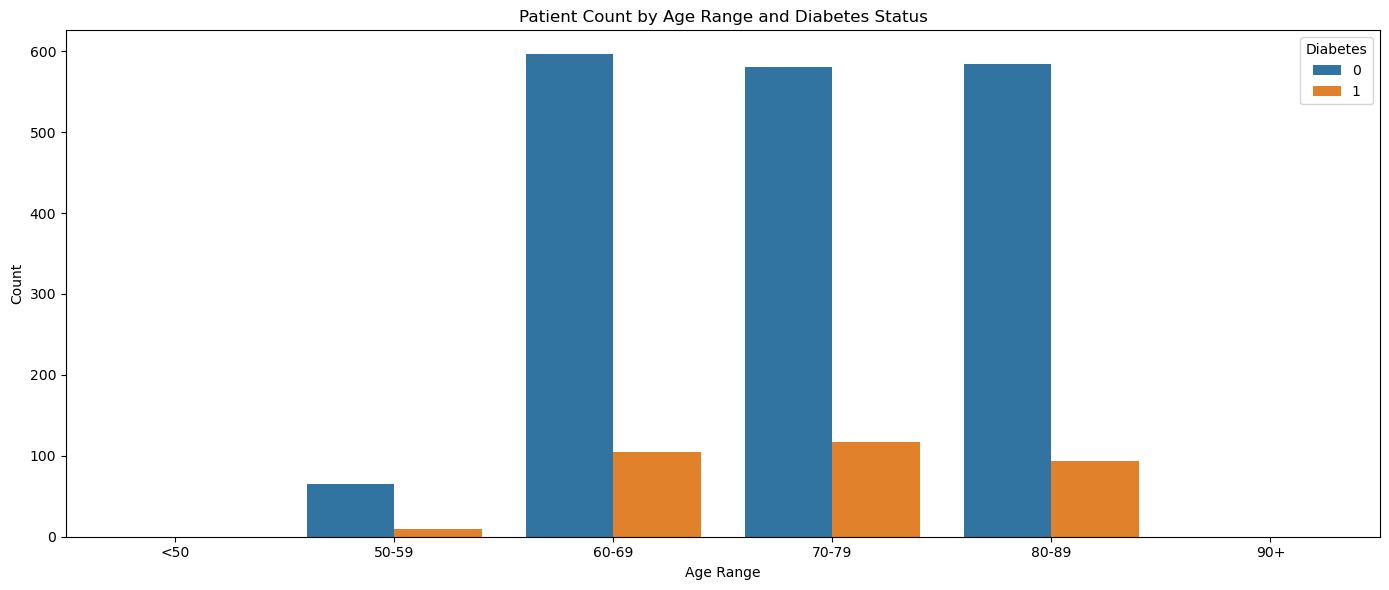

In [35]:
plt.figure(figsize=(14, 6))
sns.countplot(data=df_viz, x='AgeRange', hue='Diabetes')
plt.title('Patient Count by Age Range and Diabetes Status')
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.legend(title='Diabetes')
plt.tight_layout()
# Save the plot
plt.savefig(os.path.join(output_dir, "Patient count by age range and diabetes.png"))
plt.show()

# Gender distribution by Age Range

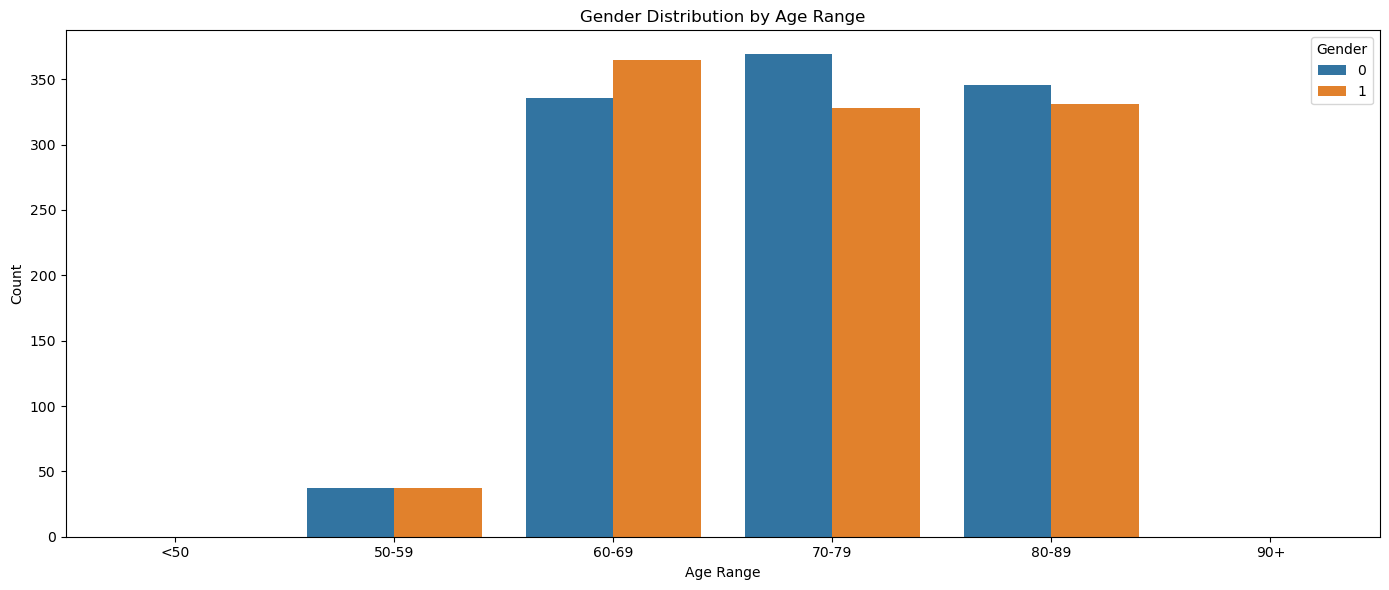

In [37]:
plt.figure(figsize=(14, 6))
sns.countplot(data=df_viz, x='AgeRange', hue='Gender')
plt.title('Gender Distribution by Age Range')
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.tight_layout()
# Save the plot
plt.savefig(os.path.join(output_dir, "gender distribution by age range.png"))
plt.show()

                             Age Range vs Ethnicity

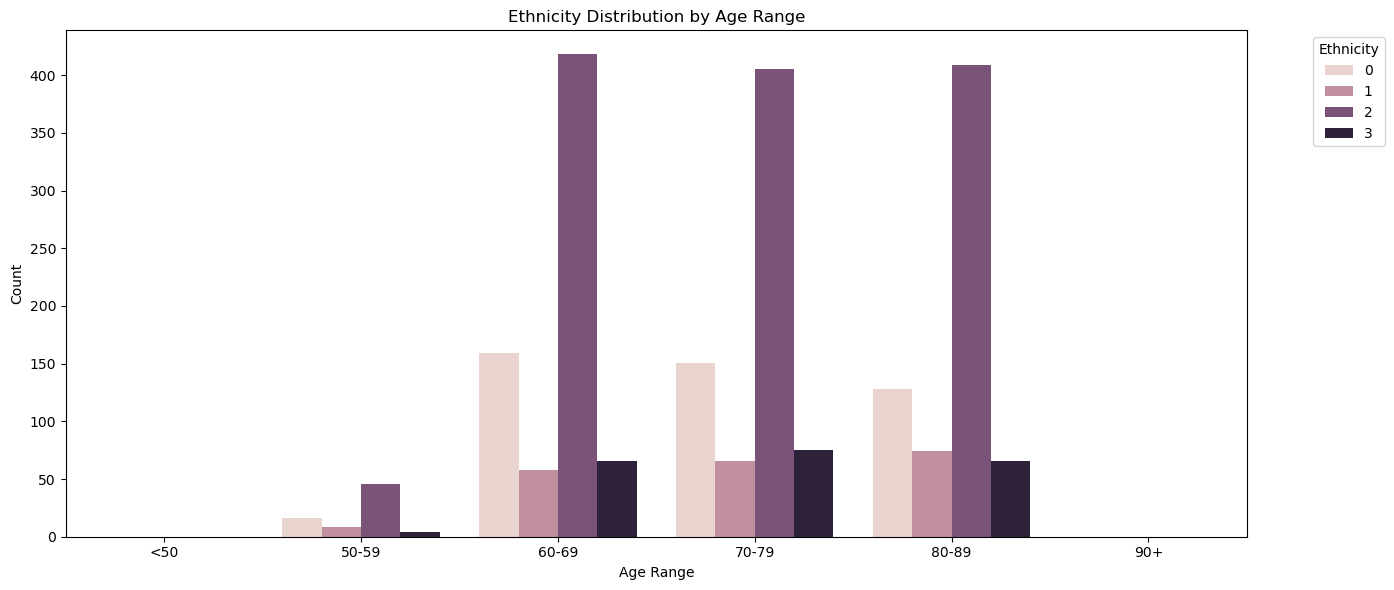

In [38]:
plt.figure(figsize=(14, 6))
sns.countplot(data=df, x='AgeRange', hue='Ethnicity')
plt.title('Ethnicity Distribution by Age Range')
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.legend(title='Ethnicity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
# Save the plot
plt.savefig(os.path.join(output_dir, "Ethnicity Distribution by Age Range.png"))
plt.show()

In [28]:
# What is the percentage of patients with a family history of Alzheimer's?
family_history_percentage = df['FamilyHistoryAlzheimers'].value_counts(normalize=True) * 100
fig = px.pie(values=family_history_percentage, names=family_history_percentage.index, title='Percentage of Patients with Family History of Alzheimer\'s', template="plotly_dark")
fig.show()

In [39]:
# How many patients have diabetes, hypertension, and cardiovascular disease?
diseases = ['Diabetes', 'Hypertension', 'CardiovascularDisease']
fig = make_subplots(rows=1, cols=3, subplot_titles=diseases)
for i, disease in enumerate(diseases, 1):
    disease_counts = df[disease].value_counts()
    fig.add_trace(go.Bar(x=disease_counts.index, y=disease_counts.values, name=disease), row=1, col=i)
fig.update_layout(title="Number of Patients with Diabetes, Hypertension, and Cardiovascular Disease", template="plotly_dark")
# Save the plot
plt.savefig(os.path.join(output_dir, "Number of Patients with Diabetes, Hypertension, and Cardiovascular Disease.png"))
fig.show()


<Figure size 640x480 with 0 Axes>